In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#lists for creating bar plots
freq_exec_time_list= []
total_frequent_itemsets_minsup= []
high_conf_rules_minsup= []

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#data = pd.read_csv('/content/drive/MyDrive/Data/small.txt')

input_file_name= "small.txt"
unames = ['transaction_ID', "ID"]
data = pd.read_table('/content/drive/MyDrive/Data/'+input_file_name, header=None,sep=' ',names=unames, engine='python')
#creating item list per transaction 
item_list = data.groupby(['transaction_ID'])['ID'].apply(list).reset_index()
item_list.columns= ['transaction_ID', 'item_list']
#print(data)
print(item_list)
#print(len(item_list))
#minsup= 50.0/ len(item_list)
#print(minsup)
minsup_count= 100
minconf= 0.8
output_name= "fun"


      transaction_ID                                          item_list
0                  0  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
1                  1                [1, 38, 39, 40, 41, 42, 43, 44, 45]
2                  2  [1, 6, 7, 10, 11, 12, 13, 15, 16, 20, 21, 22, ...
3                  3  [1, 10, 15, 19, 21, 24, 27, 28, 29, 30, 32, 33...
4                  4  [1, 11, 12, 13, 15, 21, 24, 25, 34, 36, 49, 57...
...              ...                                                ...
3051            3051  [1, 15, 58, 168, 311, 372, 427, 429, 460, 473,...
3052            3052  [1, 58, 168, 259, 350, 427, 497, 638, 740, 110...
3053            3053  [1, 58, 168, 254, 311, 335, 550, 694, 725, 749...
3054            3054  [58, 168, 227, 254, 259, 334, 372, 694, 709, 9...
3055            3055                          [168, 182, 227, 251, 311]

[3056 rows x 2 columns]


In [ ]:
#support count for each item (without creating item list)
import numpy as np
count={}
#count2={}

for i in data['ID']:
    count[i]= count.get(i, 0) + 1

#creating dataframe from the dictionary of count
df = pd.DataFrame(list(count.items()), columns = ['items','support_count'])
number_of_items= len(df)
print(len(df))

#deleting items if support_count<=minsup_count
for i in range(len(df)):
  if (df['support_count'][i]<minsup_count):
    df= df.drop(labels= i, axis =0)

# sort by support count in increasing order
df = df.reset_index(drop=True)
df = df.sort_values(by="support_count")
#saving dataframe as text file
np.savetxt(r'/content/drive/MyDrive/Data/support_count_of_items.txt', df.values, fmt='%d')

#for x in range(len(df)):
#  df["index"]= df["itemID"].transform()
#df.reset_index(inplace=True)
#df = df.rename(columns = {'index':'index1'})
df["index_item"]= range(1,len(df)+1)
print(df)  

8743
     items  support_count  index_item
111   5583            100           1
34     389            100           2
30     360            100           3
93    1832            100           4
18     258            100           5
..     ...            ...         ...
2       15            524         108
7       58            563         109
24     326            654         110
20     274            886         111
0        1           2300         112

[112 rows x 3 columns]


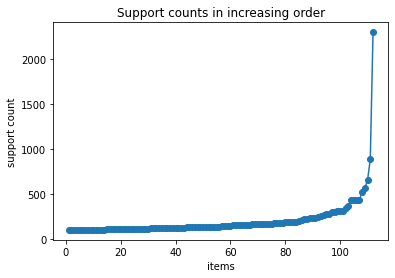

In [ ]:
#plotting items with support counts for each item where support counts are in increasing order 
import matplotlib.pyplot as plt
x= df['index_item']
y = df['support_count']
plt.scatter(x,y)
plt.plot(x,y)
#plt.gca().invert_xaxis()
plt.title("Support counts in increasing order")
plt.xlabel("items")
plt.ylabel("support count")
plt.show()

In [ ]:
df.head()
df.shape

(112, 3)

In [ ]:
#calculating F1 (1-itemset)
def support_1_itemset(df):
  list1= []
  list2= []
  #list3= []
  for item in df['items']:
    list1.append(item)# [1,2,3]
    #list2.append(list1)
    #list1.clear()
  for x in list1: #[1,2,3]
    list2.append([x]) #[[1], [2], [3]]

  return list2


In [ ]:
#candidate generation - Md Akib Zabed Khan
def candidate_generation(list2, k):
  F2 = {}
  #for i in range(len(df['items'])-1):
  #  for j in range(i+1,len(df['items'])):
  #    F2[df['items'][i], df['items'][j]] = 1
  list4= []
  for x in range(len(list2)-1): # [[1,2], [1,3], [3,4]]
    for y in range(x+1, len(list2)):
      list3= []
      count3=0
      if(k>2):
        for z in range(k-2):
          if(list2[x][z]==list2[y][z]):
            count3+=1
      if(count3==(k-2)):
        for item1 in list2[x]:
          list3.append(item1)
        for item2 in list2[y]:
          if item2 not in list3:
            list3.append(item2)
      #print(list3)
      if (len(list3))>0:
        #print(list3)
        list4.append(list3)
        #list3.clear()
  return list4



In [ ]:
#Case Test
#F1={}
#F1[1]= [[1],[2],[3],[4],[5],[6]]
#k=1
#while len(F1[k]) > 0:
#   k += 1
#   L = candidate_generation(F1[k-1], k) #Md Akib Zabed Khan 
#   #lpr = p(L, F[k-1])
#   F1[k]= L
#   print(F1[k])


In [ ]:
#itemset pruning - Neila Bennamane
def itemset_pruning(list2, list3):    #list2= L= F[k] , list3 = F[k-1]
  Lpr = []  #initialize pruned candidate dict to empty
  #for canditem in L: #for every [ canditem1 = [x0, y0], canditem2 = [x1, y1]]
  for canditem in list2: #for every [ canditem1 = [x0, y0], canditem2 = [x1, y1]]
    notfound = False #set notfound to not true
    for item in canditem: #for every item in canditem1 = [ item1 = x0, item2 = y0]
      temp = [i for i in canditem if i!=item] #insert into temp dict every item from the candidate set  x0-xn
      #if temp not in F[k-1]: #if an item is not in the candidate set's subset
      if temp not in list3: 
        notfound=True # set notfound to true if an item isnt found
        break #break out of the second for loop
    if notfound is False: # keep the itemsets that survived the pruning
      Lpr.append(canditem) # put unpruned itemsets into the pruned list of candidate itemset
  return Lpr

In [ ]:
#Test Case for pruning

#F={}
#F[1]= [[1],[2]]
#L = [[1, 2], [1,3]]

#k=2
#F[k]= [[1, 2], [1, 3], [2, 3], [3, 4]]
#L = [[1, 2, 3], [1,3,4], [1,2,3,4]]
#k=3
#print (itemset_pruning(L, F[k-1]))


In [ ]:
#support count for each item (creating the item list)- Anirudh Ravipudi
def support_count(Lpr, k):
  #sets = {}
  #for list1 in item_list['item_list']:
  
  for itemset in Lpr: 
    #[[1,2,3], [2,3,4]
    for trans in item_list['item_list']:
      #for trans in item_list:
      #[1,2,3,4,5]
      count1= 0
      for items in itemset: 
        #[1,2,3]
        if items in trans:
          count1+= 1 #count1 is counting if all the items are available in a transaction
      if (count1==len(itemset)):
        itemset1= tuple(itemset) #(1,2,3)
        count[itemset1] = count.get(itemset1, 0) + 1
          #if(count2[itemset1]> 0):
            #print(count2[itemset1])
           #count2{itemset} = 1
  return count
      


      #print(item)
      #count = 0
      #for items in Lpr:
      #  print(i)
      #  if(item == i):
      #    count = count + 1
        
      #sets[i] = count
      #print(sets[i]) 
    #for i in list1:
      #count2[i]= count2.get(i, 0) + 1
      #print(i)
  #for key in count2:
  #  if(count2[key]>50):
   #     print(key, " ", count2[key])



#test 
#F = {}
#k = 3
#F[k-1]= [[1, 2], [1,3], [2,3]]
#Lpr = [[1, 2, 3], [1,3,4], [1,2,3,4]]
#itemset = [[1,2,3,4], [1,2,3], [1,3]]
#k= 3
#item_list2= [[1, 2, 3, 4], [1,2, 3,4, 5], [1,2,3,6]]
#Lpr = itemset_pruning(L, F[k-1])
#support_c = support_count(item_list2, Lpr, k)

#for keys, values in support_c.items():
#  print(keys, " ", values)





In [ ]:
#candidate elimination- Anthony
def candidate_elimination(support_cnt, Lpr, minsup_count):
  support_cnt= count
  list1= []
  for itemset in Lpr:
    temp= tuple(itemset)
    #itemset= [1,2,3] tuple= (1,2,3)
    if(temp in support_cnt and support_cnt[temp]>=minsup_count):
      itemset1= list(temp)
      list1.append(itemset1)
  return list1

  #print("not done")

In [ ]:
# w1= {}
# w1[(1,2,3)]= 3
# list1= [1,2,3]
# temp1= tuple(list1)
# if (w1[temp1]==3): 
#   print(w1[temp1])

3


In [ ]:
#test 
# F = {}
# k = 3
# F[k-1]= [[1, 2], [1,3], [2,3]]
# L = [[1, 2, 3], [1,3,4], [1,2,3,4]]
# itemset = [[1,2,3,4], [1,2,3], [1,3]]
# item_list2= [[1, 2, 3, 4], [1,2, 3,4, 5], [1,2,3,6]]
# k= 3
# Lpr = itemset_pruning(L, F[k-1])
# support_c = support_count(item_list2, Lpr, k= 3)
# for keys, values in support_c.items():
#  print(keys, " ", values)
# print(candidate_elimination(support_c, Lpr, minsup_count= 2))


In [ ]:
# from pandas._libs.algos import diff_2d
# # generate 2- itemset
# df2 = pd.DataFrame(list(count.items()), columns = ['item1','item2'])
# for i in range(len(df)):
#  df2 = df['items', i],  df['item', i+1]

# # generate 3 - itemset 

# # generate 4 itemset

In [ ]:
##PROFESSOR NOTES 
#frequent itemsets generation part
#df
import time
k = 1 
#frequent 1 item st generation 
F = {} #frequent itemsets for k where k is the key -> a list of frequent itemsets ->value
F[1] = support_1_itemset(df) # Md Akib Zabed Khan
#print(F[1])
list_time= []
st = time.time() 
list_time.append(st) 
while len(F[k]) > 0: #if you cant generate any frequent itemsets from level k stop while loop
   k += 1
   L = candidate_generation(F[k-1], k) #Md Akib Zabed Khan 
   Lpr = itemset_pruning(L, F[k-1]) # Neila
   #to do support counting we need the data and candidate itemsets
   support_c = support_count(Lpr, k) ## we will need to support count for every transaction #Anirudh  keys are candidate itemsets of Lpr
   #support_c = support_count(L, k)
   #print(support_c.items())
   F[k] = candidate_elimination(support_c, Lpr, minsup_count) #create a dictionary for all candidate itemsets #Anthony
   print(F[k])
   et= time.time()
   list_time.append(et)

print(list_time)

   #print(L)
   #if k==2: break
   #elapsed_time = et - st 
   
# #Rule Generation
# high_conf_rule  = [<lhs>, <rhs>, <supp> ,<conf>]   
# for k in range(2, (len(F)-1)):
#    for fitemset in F[k]: 
#      n_rhs = 1
#      a(fitemset, [], n_rhs, Fsupp, minconf)

# def a(itemset, rhs, n_rhs, Fsupp, minconf): 
#    n_rhs +=1  
#    for item in fitemset: 
#        rhs = rhs_in + [item]
#        lhs = [temp in fitemset if temp!=item]
#        tconf = compute_conf(rhs, lhs, Fsupp)
#        if tconf >= minconf: 
#        #ass the rule in high_conf_riles
#          a(itemset)
#        else: 
#          return


[[27, 1], [1074, 1], [1010, 1], [4355, 1], [2762, 1], [1817, 1], [2717, 1], [1981, 1], [3815, 1], [508, 1], [2825, 1], [780, 1], [1065, 1], [998, 1], [694, 1], [474, 1], [1124, 1], [379, 1], [430, 1], [142, 1], [436, 1], [2123, 1], [346, 1], [528, 1], [179, 1], [168, 1], [1086, 1], [1342, 1], [25, 1], [254, 1], [1048, 1], [372, 1], [544, 1], [334, 1], [435, 1], [1304, 274], [1304, 1], [961, 1], [543, 1], [357, 1], [73, 1], [56, 1], [335, 1], [144, 1], [534, 274], [534, 1], [429, 274], [429, 1], [1271, 1], [1055, 1], [14, 1], [2292, 1], [411, 274], [411, 1], [465, 1], [1108, 1], [281, 274], [281, 1], [297, 1], [259, 326], [259, 274], [259, 1], [649, 1285], [649, 58], [649, 274], [649, 1], [764, 274], [764, 1], [971, 274], [971, 1], [1749, 1], [348, 58], [348, 274], [348, 1], [227, 326], [227, 274], [1285, 823], [1285, 58], [1285, 326], [1285, 274], [1285, 1], [823, 58], [823, 274], [823, 1], [1150, 15], [1150, 58], [1150, 326], [1150, 274], [1150, 1], [99, 15], [99, 58], [99, 274], [99,

In [ ]:
#result for minsup= 120, minconf= 0.9
# [[1124, 1], [142, 1], [179, 1], [168, 1], [1086, 1], [25, 1], [1048, 1], [254, 1], [372, 1], [544, 1], [334, 1], [435, 1], [1304, 274], [1304, 1], [961, 1], [543, 1], [357, 1], [73, 1], [335, 1], [56, 1], [144, 1], [534, 1], [429, 274], [429, 1], [1271, 1], [1055, 1], [14, 1], [2292, 1], [411, 1], [465, 1], [1108, 1], [281, 274], [281, 1], [297, 1], [259, 274], [259, 1], [649, 1285], [649, 274], [649, 1], [764, 1], [971, 1], [1749, 1], [348, 274], [348, 1], [227, 274], [823, 1285], [823, 274], [823, 1], [1285, 58], [1285, 326], [1285, 274], [1285, 1], [1150, 15], [1150, 274], [1150, 1], [99, 15], [99, 274], [99, 1], [15, 326], [15, 1], [58, 326], [58, 274], [58, 1], [326, 274], [326, 1], [274, 1]]
# [[1285, 58, 1], [1285, 274, 1], [58, 326, 1], [58, 274, 1], [326, 274, 1]]
# []
# [1666467070.6848202, 1666467082.5133965, 1666467082.6499147, 1666467082.649985]

In [ ]:
#frequent itemsets and support count- generating text file minsup_cnt= 120
str1= output_name+ '_items.txt'
with open(str1, 'w') as f:
    k= 1
    lines = []
    while(len(F[k])>0):
      if k==1:
        for itemset in F[k]:
          for item in itemset:
            line= str(item)+ "|"+ str(count[item])
            lines.append(line)
      else:
        line=""
        for itemset in F[k]:
          line=""
          itemset1= tuple(itemset)
          idx=0
          for item in itemset:
        
            line+=str(item)
            if(idx<len(itemset)-1):
              line+=" "
            idx+=1
          line+= "|"+ str(count[itemset1])
          #line= str(itemset1)+ "|"+ str(count2[itemset1])
          lines.append(line)
      k1=int(k)
      k+=1
    for line in lines:
        f.write(line)
        f.write('\n')


In [ ]:
exec_time_list= []
freq_exec_time=0.0
for i in range(1, len(list_time)):
  exec_time= list_time[i]- list_time[i-1]
  exec_time_list.append(exec_time)
  freq_exec_time+= exec_time
  print(exec_time)
print(freq_exec_time)
freq_exec_time_list.append(freq_exec_time)

#exec_time_list for all minsup



25.890217542648315
0.2413477897644043
0.00016999244689941406
26.13173532485962


In [ ]:
#for bar plot- total frequent itemsets list for different minsup
k3=1

total_frequent_itemsets= 0
while(len(F[k3])>0):
  total_frequent_itemsets += len(F[k3])
  k3+=1
total_frequent_itemsets_minsup.append(total_frequent_itemsets)
print(total_frequent_itemsets_minsup)




[230]


In [ ]:
# tuple11= (1, 2, 3)
# tuple12= (2, 1, 3)
# if tuple11!=tuple12:
#   print("True")

True


In [ ]:
#Results from previous code block

#[[138, 1], [7443, 4782], [7443, 4355], [7443, 1], [2973, 1], [8070, 1285], [157, 1], [3880, 1], [7446, 4782], [7446, 1], [2758, 1], [3601, 1], [3889, 1], [6698, 1], [2027, 1], [5546, 1], [1242, 1], [947, 1], [2671, 1], [1089, 1], [1701, 15], [1701, 1], [4049, 2475], [5547, 1], [4062, 910], [4062, 2475], [6435, 1], [727, 1], [1053, 1], [1277, 1], [5729, 1271], [5729, 1749], [2065, 1], [734, 1], [2353, 1], [8429, 1], [4708, 1], [457, 1], [1733, 1], [1052, 1], [1302, 1], [2394, 1], [3222, 2475], [3222, 1], [2681, 1], [2171, 1150], [1228, 1], [6316, 1], [1094, 1], [276, 1], [4834, 1010], [4834, 649], [4834, 1285], [4834, 274], [4834, 1], [735, 1], [908, 1], [456, 1], [1140, 1], [2962, 1], [2735, 1], [4289, 25], [4289, 1], [525, 25], [525, 1], [2082, 1], [2094, 15], [1751, 1], [491, 1], [1391, 1], [1162, 1], [1779, 1], [1931, 1], [710, 1], [1738, 1], [2068, 15], [1528, 1529], [2354, 1], [3339, 1], [1081, 1], [41, 1], [490, 1], [1034, 1], [3352, 1], [910, 2475], [910, 1], [1397, 1], [3528, 1], [750, 1], [1259, 1], [1728, 1], [299, 1], [554, 1], [1092, 1], [1190, 1], [609, 1285], [609, 15], [609, 1], [1030, 1], [4292, 1], [1729, 1], [660, 1], [1439, 1], [2259, 1], [6740, 1], [196, 1], [1789, 1], [282, 1], [1568, 1569], [1568, 1], [6258, 4000], [6258, 3850], [6258, 1], [1175, 1], [1584, 1], [2550, 1], [618, 1], [2895, 1], [1997, 1], [143, 772], [143, 1285], [143, 15], [143, 1], [1085, 1], [1210, 1], [2680, 1], [5726, 1271], [5726, 1749], [434, 1], [314, 1], [140, 1], [4000, 1774], [4000, 6245], [4000, 1950], [4000, 3850], [4000, 1961], [4000, 2934], [4000, 436], [4000, 435], [4000, 14], [4000, 1], [1825, 1], [1407, 1], [4944, 1], [1341, 1285], [1341, 1], [1774, 6245], [1774, 1950], [1774, 3850], [1774, 1961], [1774, 436], [1774, 14], [1774, 1], [7485, 274], [7485, 1], [818, 1], [579, 1], [449, 1285], [449, 274], [449, 1], [460, 1], [2478, 1], [1358, 777], [1358, 1], [3296, 274], [3296, 1], [3533, 1285], [3533, 15], [3533, 1], [709, 1], [230, 1], [1054, 1], [1145, 1], [2483, 1], [1306, 1], [6245, 3850], [6245, 14], [6245, 1], [467, 1], [3235, 1271], [3235, 15], [3235, 1], [2682, 1], [469, 1], [266, 1], [1571, 1], [4782, 4355], [4782, 1], [2069, 1150], [2069, 1], [751, 1], [1805, 429], [1805, 274], [1805, 1], [289, 1], [3826, 1], [89, 15], [89, 1], [916, 1], [1045, 1], [3583, 1], [1106, 1], [5255, 1], [1322, 1], [672, 1], [2114, 1150], [2114, 15], [2114, 1], [1726, 1], [1684, 1], [806, 2475], [806, 1], [100, 1], [124, 15], [124, 1], [250, 1], [1646, 1], [260, 1], [777, 1], [1873, 1], [2737, 1], [258, 1], [360, 1285], [360, 274], [360, 1], [1832, 1], [389, 1], [5583, 99], [5583, 1], [1195, 274], [1195, 1], [1950, 3850], [1950, 1], [3850, 1961], [3850, 2934], [3850, 436], [3850, 435], [3850, 14], [3850, 1], [1848, 1], [1821, 1271], [1821, 1749], [1821, 1], [1032, 1], [1192, 1], [2475, 2825], [2475, 1285], [2475, 1], [17, 1749], [17, 1], [1961, 1], [188, 274], [188, 1], [550, 1], [1284, 823], [1284, 1285], [1284, 15], [1284, 1], [1612, 1285], [1612, 15], [1612, 1], [726, 1], [399, 1], [1169, 772], [1169, 1285], [1169, 15], [1169, 1], [2934, 1], [1293, 326], [1293, 1], [1569, 274], [1569, 1], [772, 3815], [772, 823], [772, 1285], [772, 15], [772, 1], [1074, 1285], [1074, 15], [1074, 1], [277, 1], [27, 1], [1273, 144], [1273, 297], [1273, 1], [749, 1285], [749, 274], [749, 1], [1203, 1], [371, 1], [432, 274], [432, 1], [580, 15], [580, 1], [1010, 144], [1010, 649], [1010, 1285], [1010, 326], [1010, 274], [1010, 1], [4355, 1], [1515, 274], [1515, 1], [748, 1271], [748, 971], [748, 1749], [748, 1], [540, 1], [2762, 274], [2762, 1], [2717, 1], [1817, 274], [1817, 1], [1133, 274], [1133, 1], [1981, 1], [3815, 1285], [3815, 1], [2028, 274], [2028, 1], [508, 274], [508, 1], [2580, 346], [2580, 99], [2580, 15], [2580, 1], [2733, 1749], [2733, 1], [61, 15], [61, 1], [2825, 274], [2825, 1], [780, 1], [1065, 1], [998, 58], [998, 274], [998, 1], [694, 1], [1262, 274], [1262, 1], [474, 1], [1124, 326], [1124, 1], [379, 274], [379, 1], [430, 274], [430, 1], [142, 274], [142, 1], [436, 435], [436, 14], [436, 1], [2123, 1271], [2123, 649], [2123, 1749], [2123, 1150], [2123, 15], [2123, 58], [2123, 1], [346, 99], [346, 15], [346, 326], [346, 1], [528, 1], [179, 274], [179, 1], [168, 326], [168, 1], [1086, 274], [1086, 1], [1342, 1271], [1342, 1150], [1342, 15], [1342, 58], [1342, 1], [25, 274], [25, 1], [1048, 58], [1048, 1], [254, 274], [254, 1], [372, 58], [372, 274], [372, 1], [544, 15], [544, 1], [334, 99], [334, 1], [435, 14], [435, 58], [435, 1], [1304, 58], [1304, 274], [1304, 1], [961, 274], [961, 1], [543, 534], [543, 465], [543, 823], [543, 1285], [543, 99], [543, 15], [543, 326], [543, 274], [543, 1], [357, 1271], [357, 971], [357, 1749], [357, 348], [357, 1150], [357, 15], [357, 326], [357, 274], [357, 1], [73, 274], [73, 1], [56, 823], [56, 58], [56, 274], [56, 1], [335, 823], [335, 1285], [335, 15], [335, 1], [144, 297], [144, 649], [144, 1285], [144, 1150], [144, 58], [144, 326], [144, 274], [144, 1], [534, 429], [534, 971], [534, 227], [534, 1285], [534, 1150], [534, 99], [534, 274], [534, 1], [429, 465], [429, 649], [429, 971], [429, 1285], [429, 1150], [429, 326], [429, 274], [429, 1], [1271, 1055], [1271, 14], [1271, 971], [1271, 1749], [1271, 348], [1271, 1150], [1271, 99], [1271, 15], [1271, 58], [1271, 326], [1271, 1], [1055, 1749], [1055, 348], [1055, 1150], [1055, 99], [1055, 15], [1055, 58], [1055, 274], [1055, 1], [14, 1749], [14, 348], [14, 823], [14, 99], [14, 15], [14, 58], [14, 1], [2292, 99], [2292, 15], [2292, 274], [2292, 1], [411, 281], [411, 649], [411, 227], [411, 823], [411, 99], [411, 58], [411, 326], [411, 274], [411, 1], [465, 649], [465, 227], [465, 823], [465, 1285], [465, 1150], [465, 58], [465, 326], [465, 274], [465, 1], [1108, 823], [1108, 1285], [1108, 99], [1108, 58], [1108, 274], [1108, 1], [281, 649], [281, 764], [281, 227], [281, 823], [281, 1285], [281, 1150], [281, 99], [281, 58], [281, 326], [281, 274], [281, 1], [297, 649], [297, 1150], [297, 15], [297, 326], [297, 274], [297, 1], [259, 1749], [259, 99], [259, 58], [259, 326], [259, 274], [259, 1], [649, 823], [649, 1285], [649, 1150], [649, 99], [649, 15], [649, 58], [649, 326], [649, 274], [649, 1], [764, 99], [764, 58], [764, 326], [764, 274], [764, 1], [971, 1749], [971, 348], [971, 227], [971, 1150], [971, 99], [971, 15], [971, 58], [971, 326], [971, 274], [971, 1], [1749, 348], [1749, 823], [1749, 1150], [1749, 15], [1749, 58], [1749, 326], [1749, 274], [1749, 1], [348, 823], [348, 1285], [348, 1150], [348, 99], [348, 15], [348, 58], [348, 326], [348, 274], [348, 1], [227, 823], [227, 1285], [227, 99], [227, 15], [227, 58], [227, 326], [227, 274], [823, 1285], [823, 99], [823, 15], [823, 58], [823, 326], [823, 274], [823, 1], [1285, 1150], [1285, 99], [1285, 15], [1285, 58], [1285, 326], [1285, 274], [1285, 1], [1150, 99], [1150, 15], [1150, 58], [1150, 326], [1150, 274], [1150, 1], [99, 15], [99, 58], [99, 326], [99, 274], [99, 1], [15, 58], [15, 326], [15, 1], [58, 326], [58, 274], [58, 1], [326, 274], [326, 1], [274, 1]]
#[[7443, 4782, 1], [7443, 4355, 1], [7446, 4782, 1], [4834, 1010, 1], [4834, 649, 1285], [4834, 649, 1], [4834, 1285, 274], [4834, 1285, 1], [4834, 274, 1], [609, 1285, 1], [143, 1285, 15], [143, 1285, 1], [143, 15, 1], [5726, 1271, 1749], [4000, 1774, 1950], [4000, 1774, 3850], [4000, 1774, 1961], [4000, 1774, 436], [4000, 1774, 14], [4000, 1774, 1], [4000, 3850, 1961], [4000, 3850, 436], [4000, 3850, 14], [4000, 3850, 1], [1341, 1285, 1], [1774, 3850, 436], [1774, 3850, 14], [1774, 3850, 1], [1774, 436, 14], [1774, 436, 1], [449, 1285, 274], [3296, 274, 1], [3533, 1285, 15], [3533, 1285, 1], [4782, 4355, 1], [2114, 1150, 15], [360, 1285, 1], [360, 274, 1], [5583, 99, 1], [3850, 436, 14], [3850, 436, 1], [3850, 14, 1], [1284, 1285, 15], [1284, 1285, 1], [1284, 15, 1], [1169, 1285, 1], [772, 823, 1285], [772, 823, 1], [772, 1285, 15], [772, 1285, 1], [772, 15, 1], [1074, 1285, 1], [1273, 144, 1], [1010, 649, 1285], [1010, 649, 274], [1010, 649, 1], [1010, 1285, 274], [1010, 1285, 1], [1010, 326, 1], [1010, 274, 1], [2762, 274, 1], [1817, 274, 1], [3815, 1285, 1], [508, 274, 1], [998, 274, 1], [1262, 274, 1], [142, 274, 1], [346, 15, 1], [1086, 274, 1], [25, 274, 1], [372, 274, 1], [435, 58, 1], [1304, 58, 274], [1304, 58, 1], [1304, 274, 1], [961, 274, 1], [543, 1285, 1], [357, 1271, 1749], [335, 823, 1], [335, 1285, 1], [335, 15, 1], [144, 297, 1], [144, 649, 1285], [144, 649, 1], [144, 1285, 274], [144, 1285, 1], [144, 58, 1], [144, 326, 1], [144, 274, 1], [534, 1285, 274], [534, 274, 1], [429, 274, 1], [1271, 1749, 1], [1271, 15, 1], [1271, 326, 1], [1055, 58, 1], [1055, 274, 1], [14, 15, 1], [2292, 99, 1], [2292, 15, 1], [2292, 274, 1], [411, 58, 1], [411, 274, 1], [465, 1285, 1], [465, 326, 1], [465, 274, 1], [1108, 1285, 1], [1108, 99, 1], [1108, 274, 1], [281, 58, 1], [281, 326, 1], [281, 274, 1], [297, 1150, 1], [297, 15, 1], [297, 326, 1], [297, 274, 1], [259, 58, 1], [259, 326, 1], [259, 274, 1], [649, 823, 1], [649, 1285, 58], [649, 1285, 326], [649, 1285, 274], [649, 1285, 1], [649, 1150, 1], [649, 99, 1], [649, 15, 1], [649, 58, 274], [649, 58, 1], [649, 326, 1], [649, 274, 1], [764, 58, 1], [764, 274, 1], [971, 1150, 1], [971, 15, 1], [971, 58, 1], [971, 326, 1], [971, 274, 1], [1749, 326, 1], [1749, 274, 1], [348, 1150, 1], [348, 58, 1], [348, 326, 1], [348, 274, 1], [823, 1285, 1], [823, 99, 1], [823, 15, 1], [823, 58, 1], [823, 326, 1], [823, 274, 1], [1285, 1150, 274], [1285, 1150, 1], [1285, 99, 1], [1285, 15, 1], [1285, 58, 274], [1285, 58, 1], [1285, 326, 274], [1285, 326, 1], [1285, 274, 1], [1150, 99, 1], [1150, 15, 1], [1150, 58, 274], [1150, 58, 1], [1150, 326, 1], [1150, 274, 1], [99, 15, 1], [99, 58, 1], [99, 326, 1], [99, 274, 1], [15, 58, 1], [15, 326, 1], [58, 326, 274], [58, 326, 1], [58, 274, 1], [326, 274, 1]]
#[[4834, 649, 1285, 1], [4834, 1285, 274, 1], [4000, 1774, 3850, 436], [4000, 1774, 3850, 1], [1774, 3850, 436, 14], [772, 823, 1285, 1], [1010, 649, 1285, 1], [1010, 1285, 274, 1], [1304, 58, 274, 1], [144, 649, 1285, 1], [144, 1285, 274, 1], [649, 1285, 58, 1], [649, 1285, 274, 1], [649, 58, 274, 1], [1285, 58, 274, 1], [1285, 326, 274, 1], [58, 326, 274, 1]]
#[]
#[1666408844.4024417, 1666409126.0037284, 1666409130.5560634, 1666409130.7421966, 1666409130.7424557]

In [ ]:
#Rule Generation
# high_conf_rule  = [<lhs>, <rhs>, <supp> ,<conf>] 
from itertools import combinations
import math

high_conf_rule= []

def compute_conf(itemset7, rhs, lhs, support_cnt):
  support_cnt= count
  bothside= itemset7
  #print(support_cnt)
  #print(bothside)
  bothside_tuple= tuple(bothside)
  nom=0.0
  denom=0.0
  if bothside_tuple in support_cnt:
    nom= support_cnt[bothside_tuple]
    #print(bothside_tuple, " ", nom)

  if len(lhs)==1:
    for item in lhs:
      denom= support_cnt[item]
  else:
    lhs_tuple= tuple(lhs)
    if lhs_tuple in support_cnt:
      denom= support_cnt[lhs_tuple]
  #print("lhs: ", lhs, "rhs: ", rhs)
  #print(nom, " ", denom)
  if(denom==0):
    return 0, nom
  else:
    #print(float(nom/denom))
    return float(nom/denom), nom
def gen_combination(itemset3, number):
    return sum([list(map(set,combinations(itemset3, number)))], [])

def rules(itemset, rhs, support_cnt, minconf): 
  #[1,2,3], [], 1, {support count}, mincof
   #n_rhs +=1  
   #list3 =[]
   support_cnt= count
   lhs= []
   for item in itemset: 
      #if item not in rhs:
      #    rhs = rhs + [item] # [1,2,3,4]
      if item not in rhs:
          lhs.append(item) #[2,3]
   #print("n_rhs: ")
   #print("rhs: ", rhs)
   #print("lhs: ", lhs)

   tconf, support_xy = compute_conf(itemset, rhs, lhs, support_cnt) # {2,3}--> {1} X--> Y support(X,Y)/ support X
   if tconf >= minconf: 
      #add the rule in high_conf_riles
      #list3.append(lhs)
      #list3.append(rhs)
      #list3.append(support_xy)
      #list3.append(tconf)
      row1= [lhs, rhs, support_xy, tconf]
      high_conf_rule.append(row1)
      # if((n_rhs+1)<= (len(itemset)-1)):
      #    #itemset.remove
      #    #print(n_rhs+1)
      #    rules(itemset, rhs, n_rhs+1, support_cnt, minconf)
      # else:
      #   #n_rhs-=1
      #   return
      #n_rhs+=1
      #else:
      #  return 
      #rhs= []
   
      #list3.clear()
      #n_rhs -= 1
   #return high_conf_rule
# itemset_test= [4000, 1774, 3850, 436]
# n_rhs = 1
# while(n_rhs<= len(itemset_test)-1):
#    list1= gen_combination(itemset_test, n_rhs)
#    for item3 in list1:
#       rhs= list(item3)
#       rules(itemset_test, rhs, count, minconf= 0.9)
#    n_rhs += 1 
#rules([4000, 1774, 3850, 436], [], 1, count2, minconf= 0.1) # X--> Y {4000,1774, 3850}--> {436}
#print(high_conf_rule)
#print(gen_combination([4000, 1774, 3850, 436], number=3))

        
# #generating rules
number_of_high_conf_rules =[]
st1= time.time()
number_rules= 0
for k in range(2, len(F)):
   for fitemset in F[k]:
     n_rhs = 1
     while(n_rhs<= len(fitemset)-1):
       list1= gen_combination(fitemset, n_rhs)
       for item3 in list1:
         rhs= list(item3)
         rules(fitemset, rhs, count, minconf)
       n_rhs += 1 
   number_rules= len(high_conf_rule)- number_rules
   number_of_high_conf_rules.append(number_rules)
end1= time.time()
print(high_conf_rule)
#print(len(high_conf_rule))
rules_exec_time= end1-st1
print(rules_exec_time)
print(len(high_conf_rule))


[[[27], [1], 108, 0.9391304347826087], [[1074], [1], 101, 0.8782608695652174], [[1010], [1], 112, 0.9333333333333333], [[4355], [1], 114, 0.9421487603305785], [[2762], [1], 113, 0.904], [[1817], [1], 109, 0.8650793650793651], [[2717], [1], 102, 0.8095238095238095], [[3815], [1], 111, 0.8671875], [[2825], [1], 106, 0.8091603053435115], [[780], [1], 112, 0.8484848484848485], [[1065], [1], 113, 0.8432835820895522], [[998], [1], 117, 0.8602941176470589], [[1124], [1], 121, 0.8581560283687943], [[142], [1], 123, 0.8145695364238411], [[1086], [1], 131, 0.808641975308642], [[25], [1], 148, 0.8809523809523809], [[372], [1], 138, 0.8070175438596491], [[435], [1], 151, 0.8579545454545454], [[1304], [1], 155, 0.856353591160221], [[961], [1], 148, 0.8131868131868132], [[73], [1], 153, 0.8138297872340425], [[335], [1], 157, 0.8177083333333334], [[2292], [1], 202, 0.8669527896995708], [[1108], [1], 222, 0.8409090909090909], [[764], [1], 245, 0.8032786885245902], [[1304, 274], [1], 110, 0.89430894308

In [ ]:
print(type(rules))

<class 'function'>


In [ ]:
print(len(high_conf_rule))
high_conf_rules_minsup.append(len(high_conf_rule))
print(high_conf_rules_minsup)

32
[32]


In [ ]:
#generating text file for high conf rules minsup_cnt= 50, minconf= 0.8
#LHS|RHS|SUPPORT|CONFIDENCE  
with open(output_name+ '_rules.txt', 'w') as f:
    lines = []
    #for rules in high_conf_rule:
    for lhs, rhs, support_xy, conf in high_conf_rule:
          #itemset1= tuple(itemset)
          line=""
          idx1=0
          for item in lhs:
            line+=str(item)
            if idx1<(len(lhs)-1):
              line+=" "
            idx1+=1
          line+= "|"
          idx2=0
          for item1 in rhs:
            line+=str(item1)
            if idx2<(len(rhs)-1):
              line+=" "
            idx2+=1
          #line+= "|"
          line+= "|"+ str(support_xy)+ "|"+ str(conf)

          #line= str(lhs)+ "|"+ str(rhs)+ "|"+ str(support_xy)+ "|"+ str(conf)
          lines.append(line)
    for line in lines:
        f.write(line)
        f.write('\n')


In [ ]:
# generating info.txt file
# minsup: 
# - minconf: 
# - input file: 
# - output name: 
# - Number of items: 
# - Number of transactions: 
# - Number of frequent 1-itemsets: 
# - Number of frequent 2-itemsets: 
# - ... 
# - Number of frequent 𝑘 –itemsets: 
# - Total number of frequent items: 
# - The length 𝑘 of the largest 𝑘 -itemset: 
# - The most frequent itemset:  
# - Number of high confidence rules: 
# - The rule with the highest confidence: 
# - Time in seconds to find the frequent itemsets:  
# - Time in seconds to find the confident rules: 
max1=0
freq_item= -1
for item, value in count.items():
  if(count[item]>max1):
    max1= count[item]
    freq_item= item
highest_conf_rules= []
max2=0
for rule in high_conf_rule:
  if(rule[3]>max2):
    max2= rule[3]
    highest_conf_rules= rule.copy()


with open(output_name+ '_info.txt', 'w') as f:
  lines = []
  lines.append("minsup: "+ str(minsup_count))
  lines.append("input file: "+ "small.txt")
  lines.append("output file: "+ "fun_items.txt and fun_rules.txt")
  lines.append("Number of items: "+ str(number_of_items))
  lines.append("Number of transactions: "+ str(len(item_list)))
  lines.append("Number of frequent 1-itemsets: "+ str(len(F[1])))
  lines.append("Number of frequent 2-itemsets: "+ str(len(F[2])))
  lines.append("Number of frequent 3-itemsets: "+ str(len(F[3])))
  lines.append("Total number of frequent itemsets: "+ str(len(F[1])+ len(F[2])+ len(F[3])))
  lines.append("The length k of the largest k-itemset: "+ str(k1))
  lines.append("The most frequent itemset: "+ str([freq_item]))
  #lines.append("Number of high confidence rules: "+ str(len(high_conf_rule)))
  lines.append("The rule with the highest confidence: "+ "None")
  lines.append("The rule with the highest confidence: "+ str(highest_conf_rules))
  lines.append("Time in seconds to find the frequent itemsets: "+str(freq_exec_time))
  lines.append("Time in seconds to find the confident rules: "+ str(rules_exec_time))


  for line in lines:
        f.write(line)
        f.write('\n')


  

  




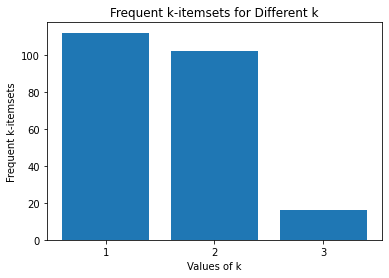

In [ ]:
#4. bar plot for frequent itemsets vs k
import matplotlib.pyplot as plt
list_x= []
list_y= []
for i in range(1, k1+1):
  list_x.append(int(i))
  list_y.append(len(F[i]))
x= list_x
y = list_y
#plt.scatter(x,y)
#plt.plot(x,y)
#plt.gca().invert_xaxis()
plt.bar(x, y)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.title("Frequent k-itemsets for Different k")
plt.xlabel("Values of k")
plt.ylabel("Frequent k-itemsets")
plt.savefig(output_name+"_plot_items.jpg")
plt.show()
#plt.savefig(output_name+"_plot_items.jpg")


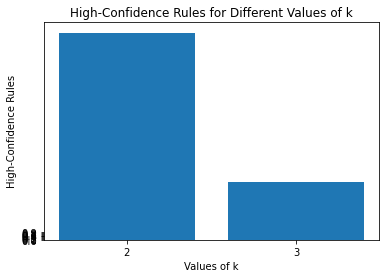

In [ ]:
#5. bar plot for number of high confidence rules for different k
import matplotlib.pyplot as plt
list_x= []
for i in range(len(number_of_high_conf_rules)):
  k2= i+2
  list_x.append(k2)
list_y= number_of_high_conf_rules.copy()
x= list_x
y = list_y
#plt.scatter(x,y)
#plt.plot(x,y)
#plt.gca().invert_xaxis()
plt.bar(x, y)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(0, 1, 0.1))
plt.title("High-Confidence Rules for Different Values of k")
plt.xlabel("Values of k")
plt.ylabel("High-Confidence Rules")
plt.savefig(output_name+"_plot_rules.jpg")
plt.show()


In [ ]:
#minsup: {50, 100, 150, 200} [Note that this is the support count (actual frequency)]  
# minconf: {0.8, 0.95} 
# For each value of minconf, generate two bar charts (or line charts).  
# - The first will show the amount of time required to find the frequent itemsets for the different 
#values of minimum support.  
# - The second will show the number of frequent itemsets that were found and the number of high 
# confidence rules that were generated (a set of bars for each of these two counts) for the different 
# values of minimum support. 





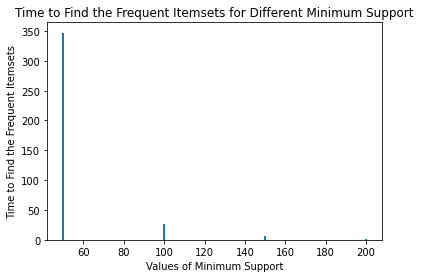

In [ ]:
#2(a) for minconf= 0.8

#x= minimum support
#y= time

list_x= [50, 100, 150, 200]
#list_x= [120]
x= list_x
y= []
for y1 in range(0, 4, 1):
  y.append(freq_exec_time_list[y1])
#plt.scatter(x,y)
#plt.plot(x,y)
#plt.gca().invert_xaxis()
plt.bar(x, y)
#plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.title("Time to Find the Frequent Itemsets for Different Minimum Support")
plt.xlabel("Values of Minimum Support")
plt.ylabel("Time to Find the Frequent Itemsets")
plt.savefig(output_name+"_plot_2a_minconf_0.8.jpg")
plt.show()

[1195, 230, 87, 48]
[367, 32, 7, 3]
[0 1 2 3]


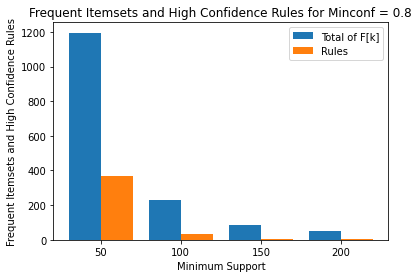

In [ ]:
#2(b) for minconf= 0.8

#x= minimum support
#y= the number of frequent itemsets and high confidence rules

import numpy as np
import matplotlib.pyplot as plt
list_x= [50, 100, 150, 200]
x= list_x
y1 = total_frequent_itemsets_minsup.copy()
print(y1)
y2= high_conf_rules_minsup.copy()
print(y2)
#plt.scatter(x,y)
#plt.plot(x,y)
#plt.gca().invert_xaxis()
X_axis = np.arange(len(x))
print(X_axis)
plt.bar(X_axis - 0.2, y1, 0.4, label = 'Total of F[k]')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'Rules')
plt.title("Frequent Itemsets and High Confidence Rules for Minconf = 0.8")
plt.xlabel("Minimum Support")
plt.ylabel("Frequent Itemsets and High Confidence Rules")
plt.xticks(X_axis, x)
plt.legend()

plt.savefig(output_name+"_plot_2b_minconf_0.8.jpg")
plt.show()
#plt.bar(x, y)

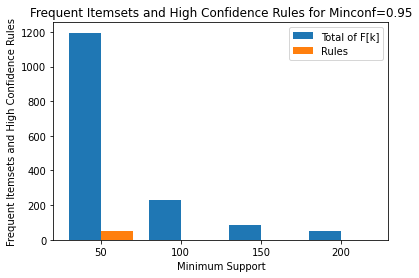

In [ ]:
#2(b) for minconf= 0.95

#x= minimum support
#y= the number of frequent itemsets and high confidence rules

import numpy as np

list_x= [50, 100, 150, 200]
x= list_x
y1 = []
for n1 in range(4, len(total_frequent_itemsets_minsup)):
  y1.append(total_frequent_itemsets_minsup[n1])
y2= []
for n2 in range(4, len(high_conf_rules_minsup)):
  y2.append(high_conf_rules_minsup[n2])
#plt.scatter(x,y)
#plt.plot(x,y)
#plt.gca().invert_xaxis()
X_axis = np.arange(len(x))
plt.bar(X_axis - 0.2, y1, 0.4, label = 'Total of F[k]')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'Rules')
plt.title("Frequent Itemsets and High Confidence Rules for Minconf=0.95")
plt.xlabel("Minimum Support")
plt.ylabel("Frequent Itemsets and High Confidence Rules")
plt.xticks(X_axis, x)
plt.legend()
plt.savefig(output_name+"_plot_2b_minconf_0.95.jpg")
plt.show()
#plt.bar(x, y)